# This notebook is used to perform bioLUCID on scanpy embedded data

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import scvi
import biolucid

/scratch/silas.sun/anaconda3/envs/py_scrna_seq/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/scratch/silas.sun/anaconda3/envs/py_scrna_seq/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/scratch/silas.sun/anaconda3/envs/py_scrna_seq/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/scratch/silas.sun/anaconda3/envs/py_scrna_seq/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/scratch/silas.sun/anaconda3/envs/py_scrna_seq/lib/python3

# Load data

In [2]:
adata = scvi.data.heart_cell_atlas_subsampled()

INFO     File data/hca_subsampled_20k.h5ad already downloaded                                                      


In [3]:
adata.obs

,NRP,age_group,cell_source,cell_type,donor,gender,n_counts,n_genes,percent_mito,percent_ribo,region,sample,scrublet_score,source,type,version,cell_states,Used
AACTCCCCACGAGAGT-1-HCAHeart7844001,Yes,65-70,Sanger-CD45,Myeloid,D6,Male,1420.0,738,0.054930,0.064789,LA,HCAHeart7844001,0.113475,CD45+,DCD,V2,LYVE1+MØ1,Yes
ATAACGCAGAGCTGGT-1-HCAHeart7829979,No,70-75,Sanger-Nuclei,Ventricular_Cardiomyocyte,D4,Female,844.0,505,0.001185,0.001185,RV,HCAHeart7829979,0.085546,Nuclei,DCD,V2,vCM1,Yes
GTCAAGTCATGCCACG-1-HCAHeart7702879,Yes,60-65,Sanger-Nuclei,Fibroblast,D2,Male,1491.0,862,0.000000,0.005366,RA,HCAHeart7702879,0.197861,Nuclei,DCD,V2,FB2,Yes
GGTGATTCAAATGAGT-1-HCAHeart8102858,Yes,60-65,Sanger-CD45,Endothelial,D11,Female,2167.0,1115,0.064144,0.027227,LA,HCAHeart8102858,0.113475,CD45+,DCD,V3,EC10_CMC-like,Yes
AGAGAATTCTTAGCAG-1-HCAHeart8102863,Yes,60-65,Sanger-Cells,Endothelial,D11,Female,7334.0,2505,0.093537,0.040496,RA,HCAHeart8102863,0.132150,Cells,DCD,V3,EC5_art,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGTCAGGCAAGGCTCC-1-HCAHeart7985087,No,55-60,Sanger-Nuclei,Ventricular_Cardiomyocyte,D3,Male,4478.0,2243,0.002233,0.001340,RV,HCAHeart7985087,0.185751,Nuclei,DBD,V2,vCM1,Yes
AGTCACAAGACGAGCT-1-H0035_RV,No,45-50,Harvard-Nuclei,Pericytes,H7,Female,967.0,630,0.002068,0.004137,RV,H0035_RV,0.081779,Nuclei,DBD,V3,PC1_vent,Yes
GGTGAAGGTTCCACAA-1-HCAHeart7844001,Yes,65-70,Sanger-CD45,Lymphoid,D6,Male,1599.0,619,0.041901,0.155722,LA,HCAHeart7844001,0.074830,CD45+,DCD,V2,CD4+T_tem,Yes
CAGCTAAGTACAGACG-1-HCAHeart7702876,Yes,60-65,Sanger-Nuclei,Atrial_Cardiomyocyte,D2,Male,3715.0,1523,0.000269,0.002423,LA,HCAHeart7702876,0.048649,Nuclei,DCD,V2,aCM3,Yes


In [4]:
print(f"Number of cells: {adata.n_obs}")
print(f"Number of genes: {adata.n_vars}")
print("Unique batches:")
print(adata.obs['donor'].unique())
print("\nUnique cell types:")
print(adata.obs['cell_type'].unique())

Number of cells: 18641
Number of genes: 26662
Unique batches:
['D6', 'D4', 'D2', 'D11', 'H4', ..., 'D1', 'D7', 'H6', 'H7', 'H3']
Length: 14
Categories (14, object): ['D1', 'D2', 'D3', 'D4', ..., 'H4', 'H5', 'H6', 'H7']

Unique cell types:
['Myeloid', 'Ventricular_Cardiomyocyte', 'Fibroblast', 'Endothelial', 'Adipocytes', ..., 'Atrial_Cardiomyocyte', 'Smooth_muscle_cells', 'Neuronal', 'Lymphoid', 'Mesothelial']
Length: 11
Categories (11, object): ['Adipocytes', 'Atrial_Cardiomyocyte', 'Endothelial', 'Fibroblast', ..., 'Neuronal', 'Pericytes', 'Smooth_muscle_cells', 'Ventricular_Cardiomyocyte']


In [5]:
print("Batch-celltype distribution:")
print(pd.crosstab(adata.obs['donor'], adata.obs['cell_type']))

Batch-celltype distribution:
cell_type  Adipocytes  Atrial_Cardiomyocyte  Endothelial  Fibroblast  \
donor                                                                  
D1                  0                    10           38         101   
D2                 19                   100          136         570   
D3                  5                   127          151         202   
D4                 11                    92          114         310   
D5                  3                   109          179         237   
D6                  6                    98         1673         116   
D7                  8                   129          365         143   
D11                 8                    10          896         153   
H2                 11                    11          127          99   
H3                 19                    63          104         125   
H4                  7                    25           70          69   
H5                 20              

# Run bioLUCID

In [6]:
analyzer = biolucid.core.BatchEffectAnalyzer(
    adata,
    params={
        'batch_key': 'donor',         
        'celltype_key': 'cell_type',
    }
)

2025-11-04 14:00:23,974 - INFO - Initialized analyzer with valid parameters
2025-11-04 14:00:23,975 - INFO - === Analysis Parameters ===
2025-11-04 14:00:23,975 - INFO - batch_key: donor
2025-11-04 14:00:23,975 - INFO - celltype_key: cell_type
2025-11-04 14:00:23,976 - INFO - min_cells: 20
2025-11-04 14:00:23,976 - INFO - abundant_gene_threshold: 1
2025-11-04 14:00:23,976 - INFO - min_abundant_genes: 100


In [7]:
# it costs 3 minutes to run the analysis
analyzer.run_analysis()

2025-11-04 14:00:23,981 - INFO - Starting analysis pipeline
2025-11-04 14:00:23,982 - INFO - Preprocessing data
2025-11-04 14:00:23,982 - INFO - Starting data preprocessing
2025-11-04 14:00:24,055 - INFO - Retained 15066 / 18641 cells after cell type filtering
2025-11-04 14:00:24,056 - INFO - Retained cell types: ['Endothelial', 'Fibroblast', 'Pericytes', 'Ventricular_Cardiomyocyte']
2025-11-04 14:00:24,056 - INFO - Cell counts per batch for retained cell types:
2025-11-04 14:00:24,057 - INFO - Batch D1:
2025-11-04 14:00:24,058 - INFO -   Endothelial: 38 cells
2025-11-04 14:00:24,058 - INFO -   Fibroblast: 101 cells
2025-11-04 14:00:24,059 - INFO -   Pericytes: 77 cells
2025-11-04 14:00:24,059 - INFO -   Ventricular_Cardiomyocyte: 326 cells
2025-11-04 14:00:24,059 - INFO - Batch D2:
2025-11-04 14:00:24,060 - INFO -   Endothelial: 136 cells
2025-11-04 14:00:24,060 - INFO -   Fibroblast: 570 cells
2025-11-04 14:00:24,060 - INFO -   Pericytes: 241 cells
2025-11-04 14:00:24,061 - INFO -   

bioLUCIDResult(Global_b_score=np.float32(0.6179264), Global_q_sh_score=np.float32(0.1977979), Global_q_sp_score=np.float32(0.15499267), b_score_per_batch={'D1': np.float32(0.5844757), 'D2': np.float32(0.56991696), 'D3': np.float32(0.54296905), 'D4': np.float32(0.6690537), 'D5': np.float32(0.62286586), 'D6': np.float32(0.7141132), 'D7': np.float32(0.5712998), 'D11': np.float32(0.5007987), 'H2': np.float32(0.63303196), 'H3': np.float32(0.6852044), 'H4': np.float32(0.5956181), 'H5': np.float32(0.66752005), 'H6': np.float32(0.6402771), 'H7': np.float32(0.65382445)}, q_sh_score_per_batch={'D1': np.float32(0.14584973), 'D2': np.float32(0.11698849), 'D3': np.float32(0.13796264), 'D4': np.float32(0.13729821), 'D5': np.float32(0.17687158), 'D6': np.float32(0.395098), 'D7': np.float32(0.21888804), 'D11': np.float32(0.3095035), 'H2': np.float32(0.18720458), 'H3': np.float32(0.19906995), 'H4': np.float32(0.17541136), 'H5': np.float32(0.19027656), 'H6': np.float32(0.18435106), 'H7': np.float32(0.19

# Get results

In [8]:
results = analyzer.results

In [9]:
# import pickle
# with open('output_file.pkl','wb') as f:
#     pickle.dump(results, f)

# Vis

In [10]:
global_results_df,per_sample_results_df = biolucid.visualization.results_to_df(results)

In [11]:
global_results_df

,Global_b_score,Global_q_sp_score,Global_q_sh_score
0,0.617926,0.154993,0.197798


In [12]:
per_sample_results_df

,q_sh_score_per_batch,q_sp_score_per_batch,b_score_per_batch,recommendation
D1,0.145850,0.122976,0.584476,Keep
D2,0.116988,0.101628,0.569917,Keep
D3,0.137963,0.126575,0.542969,Keep
D4,0.137298,0.096564,0.669054,Keep with caution
D5,0.176872,0.137629,0.622866,Keep with caution
D6,0.395098,0.249988,0.714113,Keep with caution
D7,0.218888,0.189612,0.571300,Keep
D11,0.309503,0.309009,0.500799,Keep
H2,0.187205,0.142534,0.633032,Keep with caution
H3,0.199070,0.134930,0.685204,Keep with caution


## Barplot

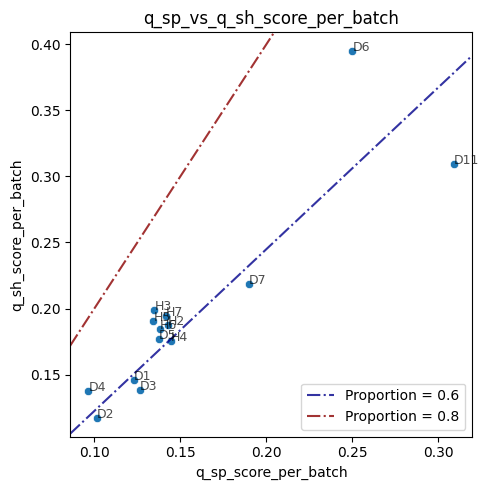

In [13]:
biolucid.visualization.plot_scatter_analysis(per_sample_results_df)